In [1]:
# Внимание!!! Важно, что бы файлы с данными и исполняемый файл находились в одной папке, 
# тогда пути к тестовым и тренировочным наборам будут содержать только имена файлов.
# 
# В пути к тренировочным и тестовым данным запрежается использовать абсалютную адресацию, 
# то есть адресацию, в которой присутствуют имена папок. Путь должен содержать только имя файла.
#
# Напоминание: под моделью машинного обучения понимаются все действия с исходными данными, 
# которые необходимо произвести, что бы сопоставить признаки целевому значению.

### Область работы 1 (библиотеки)

In [3]:
# Данный блок в области 1 НЕ выполняется преподавателем
# 
# данный блок предназначен только для подключения необходимых библиотек
# запрещается подключать библиотеки в других блоках
#
# установка дополнительных библиотек размещается прямо здесь (обязательно закоментированы)
#
# pip install

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, cross_validate, FixedThresholdClassifier, TunedThresholdClassifierCV, GridSearchCV
from sklearn.metrics import fbeta_score, make_scorer, log_loss
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from collections import OrderedDict
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

### Область работы 2 (поиск  модели .... )

In [6]:
# Данный блок(и) НЕ выполняются преподавателем в области 2
# блок(и) предназначены для поиска лучшей модели 
# должен быть понятен и очевиден отбор параметров модели
# 
# Запрещается размещать данные блоки за пределами обасти 2
# Все блоки данной области должны быть выполнены
#
# ЗАПРЕЩАЕТСЯ ИСПОЛЬЗОВАТЬ ТЕСТОВЫЙ НАБОР
#
# Путь к тренировочному набору
# 

path_train = 'train.csv' # содержит только имя файла, без имен папок !!!

#### загружаем датасет

In [8]:
train = pd.read_csv(path_train)
train_y = pd.read_csv('train_Y.csv')
train['Diabetes_binary'] =  train_y['Diabetes_binary']

#### нет пропусков

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47363 entries, 0 to 47362
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   HighBP                47363 non-null  float64
 1   HighChol              47363 non-null  float64
 2   CholCheck             47363 non-null  float64
 3   BMI                   47363 non-null  float64
 4   Smoker                47363 non-null  float64
 5   Stroke                47363 non-null  float64
 6   HeartDiseaseorAttack  47363 non-null  float64
 7   PhysActivity          47363 non-null  float64
 8   Fruits                47363 non-null  float64
 9   Veggies               47363 non-null  float64
 10  HvyAlcoholConsump     47363 non-null  float64
 11  AnyHealthcare         47363 non-null  float64
 12  NoDocbcCost           47363 non-null  float64
 13  GenHlth               47363 non-null  float64
 14  MentHlth              47363 non-null  float64
 15  PhysHlth           

#### нет аномалий в данных

In [12]:
train.describe()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
count,47363.000000,47363.000000,47363.000000,47363.000000,47363.000000,47363.000000,47363.000000,47363.000000,47363.000000,47363.000000,...,47363.000000,47363.000000,47363.000000,47363.000000,47363.000000,47363.000000,47363.000000,47363.000000,47363.000000,47363.000000
mean,0.563879,0.523468,0.975741,29.862551,0.475118,0.062834,0.148766,0.701940,0.610814,0.788844,...,0.094145,2.835272,3.732829,5.788105,0.252349,0.457213,8.587294,4.923485,5.703292,0.500011
std,0.495908,0.499454,0.153855,7.144498,0.499386,0.242666,0.355861,0.457411,0.487571,0.408133,...,0.292034,1.112528,8.145554,10.044184,0.434365,0.498171,2.847747,1.027849,2.174629,0.500005
min,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000,0.000000
50%,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000,1.000000
75%,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,4.000000,2.000000,5.000000,1.000000,1.000000,11.000000,6.000000,8.000000,1.000000
max,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000,1.000000


#### есть дубликаты

In [14]:
train.duplicated().sum()

785

In [15]:
train.drop_duplicates(inplace=True)

#### EDA

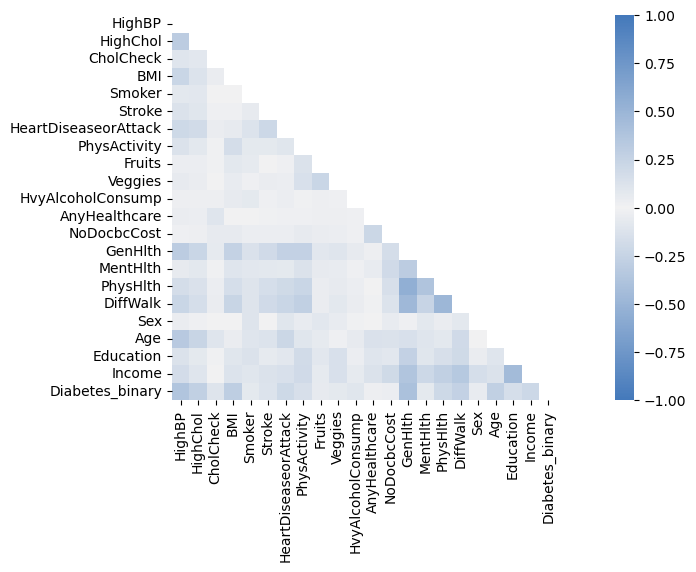

In [17]:
corr = train.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
fig, ax = plt.subplots(figsize=(15, 5))
sns.heatmap(corr,
    mask=mask,
    cmap=sns.diverging_palette(250, 250, as_cmap=True),
    annot = False,
    vmin=-1.0, vmax=1.0,
    square=True,
    ax=ax);

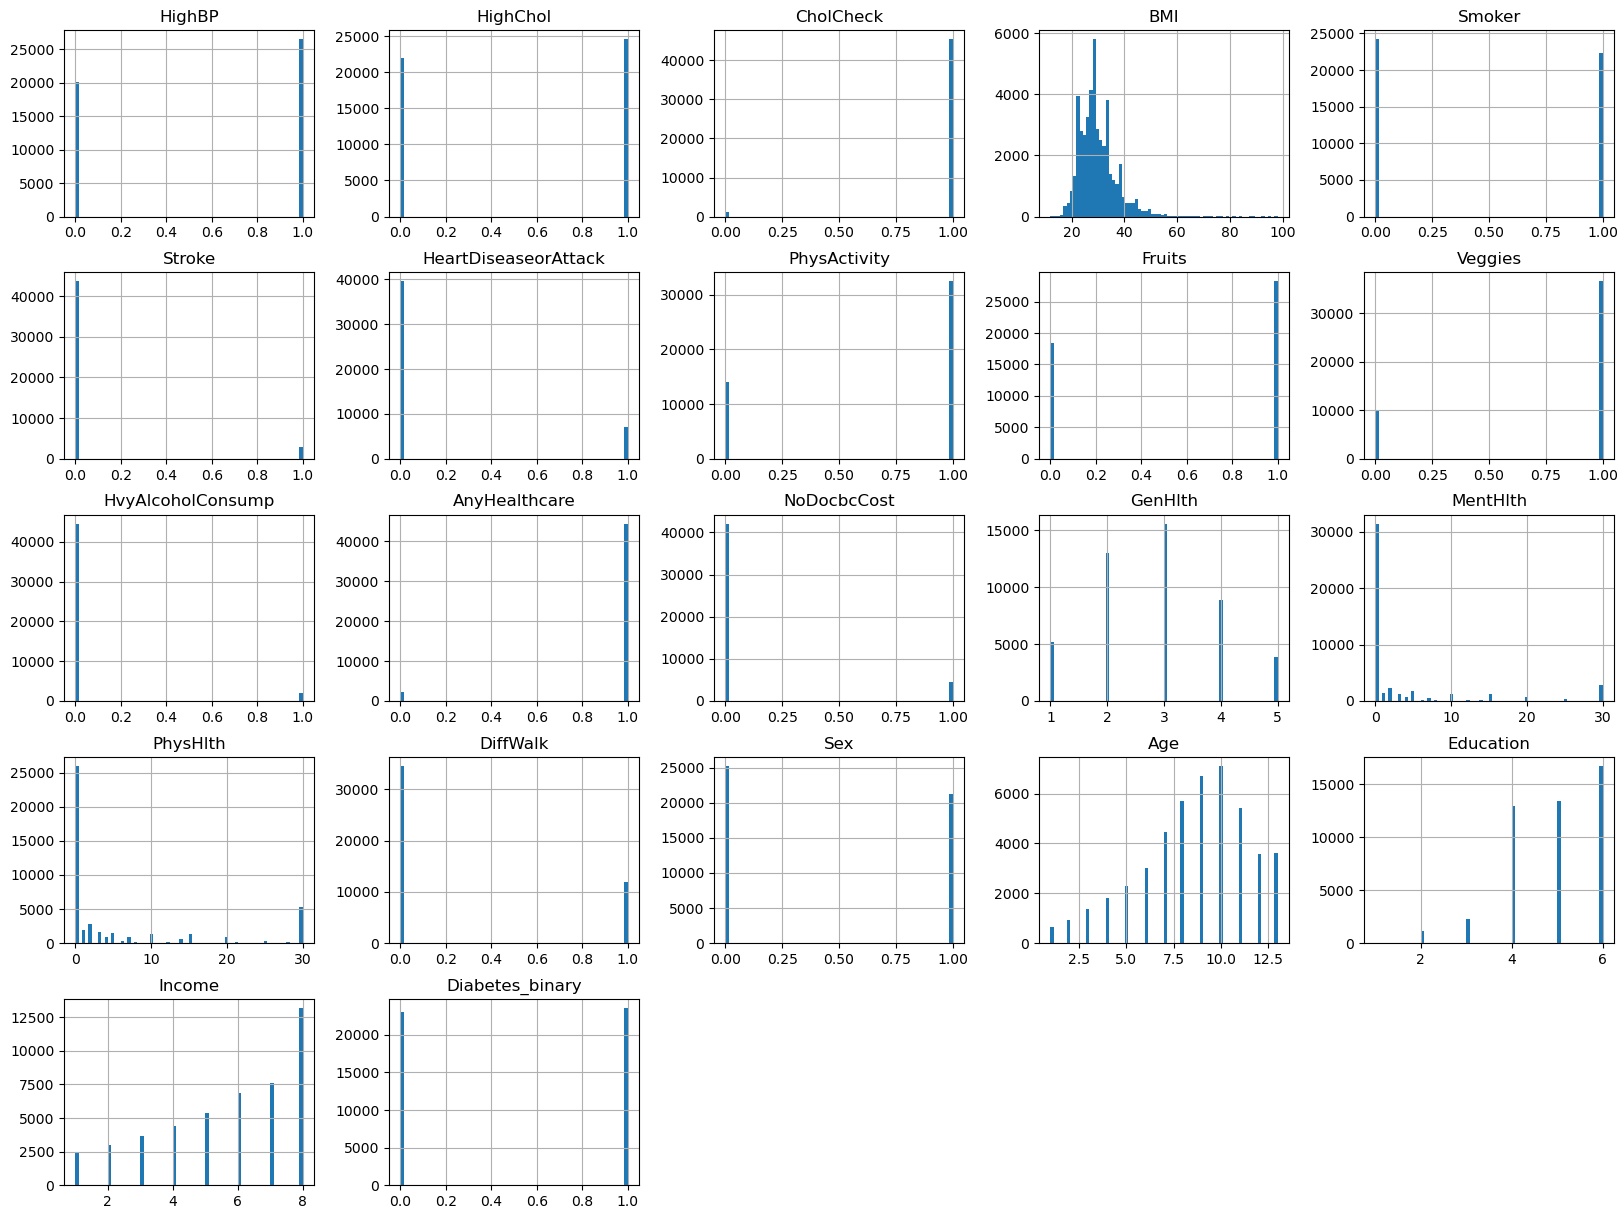

In [18]:
train.hist(bins = 70, figsize = (20,15))
plt.show()

In [19]:
train.nunique()

HighBP                   2
HighChol                 2
CholCheck                2
BMI                     78
Smoker                   2
Stroke                   2
HeartDiseaseorAttack     2
PhysActivity             2
Fruits                   2
Veggies                  2
HvyAlcoholConsump        2
AnyHealthcare            2
NoDocbcCost              2
GenHlth                  5
MentHlth                31
PhysHlth                31
DiffWalk                 2
Sex                      2
Age                     13
Education                6
Income                   8
Diabetes_binary          2
dtype: int64

In [20]:
for col in train.columns.to_list():
    print(f'Признак: {col}')
    print(train[col].value_counts())
    print()

Признак: HighBP
HighBP
1.0    26526
0.0    20052
Name: count, dtype: int64

Признак: HighChol
HighChol
1.0    24580
0.0    21998
Name: count, dtype: int64

Признак: CholCheck
CholCheck
1.0    45432
0.0     1146
Name: count, dtype: int64

Признак: BMI
BMI
27.0    4133
26.0    3264
28.0    3001
30.0    2866
29.0    2805
        ... 
12.0       1
74.0       1
83.0       1
78.0       1
80.0       1
Name: count, Length: 78, dtype: int64

Признак: Smoker
Smoker
0.0    24211
1.0    22367
Name: count, dtype: int64

Признак: Stroke
Stroke
0.0    43602
1.0     2976
Name: count, dtype: int64

Признак: HeartDiseaseorAttack
HeartDiseaseorAttack
0.0    39549
1.0     7029
Name: count, dtype: int64

Признак: PhysActivity
PhysActivity
1.0    32472
0.0    14106
Name: count, dtype: int64

Признак: Fruits
Fruits
1.0    28231
0.0    18347
Name: count, dtype: int64

Признак: Veggies
Veggies
1.0    36587
0.0     9991
Name: count, dtype: int64

Признак: HvyAlcoholConsump
HvyAlcoholConsump
0.0    44573
1.0    

#### Таким образом, данные достаточно сбалансированы по целевой переменной *Diabetes_binary*, большинство признаков - бинарные, данные мало коррелированы.

#### Разделим данные

In [23]:
X = train.drop(columns = 'Diabetes_binary')
y = train['Diabetes_binary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

### 0. Метрика должна быть нацелена на выявление диабета, при этом штрафовать за пропущенный диабет в два раза больше, чем за ошибочный диагноз диабета.

Я думаю, что эта метрика - это `fbeta_score`. Почему?

Если $F_{\beta} = \dfrac{(1+\beta^2) \cdot TP}{(1+\beta^2) \cdot TP + FP + \beta^2 \cdot FN}$ и $\beta = \sqrt{2}$, то коэффициент при $FP$ (ошибочный диабет) будет в 2 раза меньше, чем коэффициент при $FN$ (пропущенный диабет), так как всё это в знаменателе, то получим, что $FN$ уменьшает метрику $F_{\beta}$ в 2 раза сильнее, чем $FP$. Более того, в метрике $F_{\beta}$ учитывается именно $TP$, то есть можно считать, что она направлена на выявление диабета

In [26]:
f2_scorer = make_scorer(fbeta_score, beta=2**(1/2))
f2_scorer

make_scorer(fbeta_score, response_method='predict', beta=1.4142135623730951)

### 1. Оценка полученная на основе алгоритма RandomForestClassifier

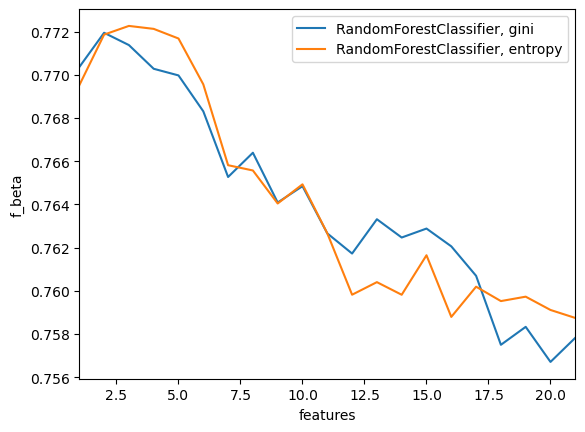

In [28]:
min_features = 1
max_features = train.shape[1] - 1

ensemble_clfs = [
    (
        "RandomForestClassifier, gini",
        RandomForestClassifier(
            criterion='gini',
            min_samples_leaf = 5,
            n_jobs = -1,
            oob_score=True,
            random_state=42,
        ),
    ),
    (
        "RandomForestClassifier, entropy",
        RandomForestClassifier(
            criterion='entropy',
            min_samples_leaf = 5,
            n_jobs = -1,
            oob_score=True,
            random_state=42,
        ),
    )
]

# Сопоставляем имя классификатора со списком пар (<n_estimators>, <коэффициент ошибок>).
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

for label, clf in ensemble_clfs:
    for i in range(min_features, max_features + 1):
        clf.set_params(n_estimators = 100, max_features = i)
        clf.fit(X_train, y_train)
        score = fbeta_score(y_test, clf.predict(X_test), beta=2**(1/2))
        error_rate[label].append((i, score))

for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_features, max_features)
plt.xlabel("features")
plt.ylabel("f_beta")
plt.legend(loc="upper right")
plt.show()

In [29]:
forest = RandomForestClassifier(criterion='entropy', n_estimators=100, max_features=5, min_samples_leaf=5, oob_score=True)
forest.fit(X_train, y_train)

print('Правильность на обучающем наборе: {:.3f}'.format(fbeta_score(y_train, forest.predict(X_train), beta=2**(1/2))))
print('Правильность на тестовом наборе: {:.3f}'.format(fbeta_score(y_test, forest.predict(X_test), beta=2**(1/2))))

Правильность на обучающем наборе: 0.849
Правильность на тестовом наборе: 0.770


#### Попробуем затюнить порог (всё-таки мы штрафуем $FN$ и $FP$ по-разному)

In [31]:
cv = StratifiedShuffleSplit(test_size = 0.25, n_splits = 10)

In [32]:
model_origin = forest
cv_scores = [
    'train_score',
    'test_score'
]

cv_results_model_origin = pd.DataFrame(
    cross_validate(
        model_origin,
        X_train,
        y_train,
        scoring=f2_scorer,
        cv=cv,
        return_train_score=True,
        return_estimator=True,
    )
)
cv_results_model_origin[cv_scores].agg(["mean", "std"]).T

,mean,std
train_score,0.849793,0.001514
test_score,0.771321,0.002780


In [33]:
model_tuned = TunedThresholdClassifierCV(estimator=model_origin, scoring=f2_scorer)
cv_results_model_tuned = pd.DataFrame(
    cross_validate(
        model_tuned,
        X_train,
        y_train,
        scoring=f2_scorer,
        cv=cv,
        return_train_score=True,
        return_estimator=True,
    )
)
cv_results_model_tuned[cv_scores].agg(["mean", "std"]).T

,mean,std
train_score,0.850760,0.003008
test_score,0.816683,0.001861


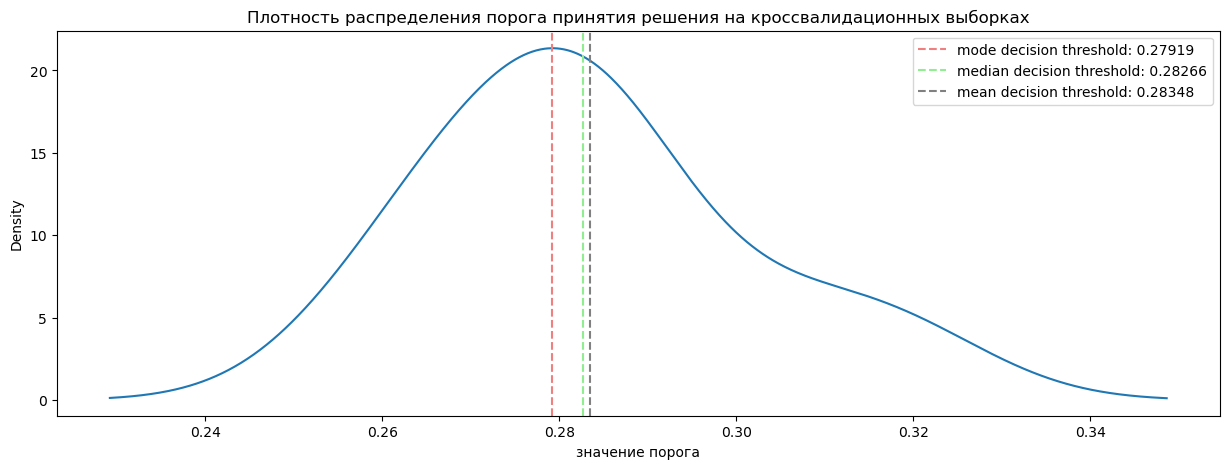

In [34]:
decision_threshold = pd.Series(
    [est.best_threshold_ for est in cv_results_model_tuned["estimator"]],
)

fig, ax = plt.subplots(figsize=(15,5))

ax = decision_threshold.plot.kde(bw_method=None)
line = ax.get_lines()
x_plt, y_plt = line[0].get_data()

ths = {
    'mode':   [x_plt[np.argmax(y_plt)],'lightcoral'],
    'median': [decision_threshold.median(), 'lightgreen'],
    'mean':   [decision_threshold.mean(),  'gray']
}

for key in ths.keys():
    ax.axvline(
        ths[key][0],
        color=ths[key][1],
        linestyle="--",
        label=f"{key} decision threshold: {ths[key][0]:.5f}",
    )

ax.set_xlabel("значение порога")
ax.legend(loc="upper right")
_ = ax.set_title(
    "Плотность распределения порога принятия решения на кроссвалидационных выборках"
)

In [35]:
ths_final = {
    'origin': 0.5,
    'mode':   x_plt[np.argmax(y_plt)],
    'median': decision_threshold.median(),
    'mean':   decision_threshold.mean(),
}
comparison =pd.DataFrame()
for key in ths_final:
    final_tune = FixedThresholdClassifier(model_origin, threshold=ths_final[key]).fit(X_train, y_train)
    comparison.loc[key,'train']= fbeta_score(y_train, final_tune.predict(X_train), beta=2**(1/2))
    comparison.loc[key,'test'] = fbeta_score(y_test, final_tune.predict(X_test), beta=2**(1/2))

comparison.sort_values(by='test')

,train,test
origin,0.849396,0.768975
median,0.850232,0.806638
mean,0.851274,0.807698
mode,0.850206,0.807784


Таким образом, финальный вариант модели

In [37]:
forest = RandomForestClassifier(criterion='entropy', n_estimators=100, max_features=4, min_samples_leaf=5, oob_score=True)
forest.fit(X_train, y_train)

forest_other_threshold = FixedThresholdClassifier(forest, threshold=0.28, response_method="predict_proba")
forest_other_threshold.fit(X_train, y_train)

print('Правильность на обучающем наборе: {:.3f}'.format(fbeta_score(y_train, forest_other_threshold.predict(X_train), beta=2**(1/2))))
print('Правильность на тестовом наборе: {:.3f}'.format(fbeta_score(y_test, forest_other_threshold.predict(X_test), beta=2**(1/2))))

Правильность на обучающем наборе: 0.846
Правильность на тестовом наборе: 0.808


### 2. Оценка полученная на основе алгоритма GradientBoostingClassifier

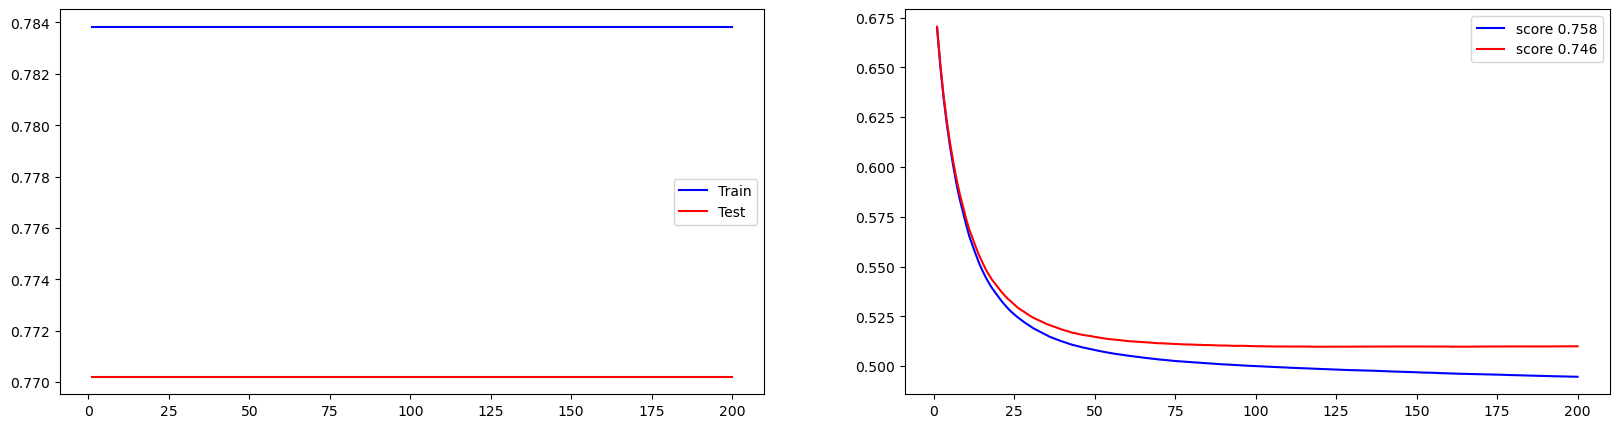

In [39]:
def plot_learnig_tree(estimator, X_train, X_test, y_train, y_test):  
    
    fig = plt.figure(figsize=(20,5))
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)
    n_estimators = estimator.n_estimators_
    zero = np.zeros(n_estimators, dtype=np.float64)
    color_one = 'blue'
    color_two = 'red'
    
    train_score = zero
    for i, y_pred_train in enumerate(estimator.staged_predict(X_train)):
        train_score[i] = fbeta_score(y_train, estimator.predict(X_train), beta=2**(1/2))
    ax1.plot(
        (np.arange(train_score.shape[0]) + 1),
        train_score,
        "-",
        color=color_one,
        label='Train',
        )
        
    test_score = zero
    for i, y_pred_test in enumerate(estimator.staged_predict(X_test)):
        train_score[i] = fbeta_score(y_test, estimator.predict(X_test), beta=2**(1/2))   
    ax1.plot(
        (np.arange(test_score.shape[0]) + 1),
        train_score,
        "-",
        color = color_two,
        label='Test',
        )
    ax1.legend(loc='best')


    train_deviance = zero
    for i, y_pred_train in enumerate(estimator.staged_predict_proba(X_train)):
        train_deviance[i] = log_loss(y_train, y_pred_train)
        
    ax2.plot(
        (np.arange(train_deviance.shape[0]) + 1),
        train_deviance,
        '-',
        color=color_one,
        label="score "+str(round(estimator.score(X_train, y_train),3))
    )

    test_deviance = zero
    for i, y_pred_test in enumerate(estimator.staged_predict_proba(X_test)):
        test_deviance[i] = log_loss(y_test, y_pred_test)
        
    ax2.plot(
        (np.arange(test_deviance.shape[0]) + 1),
        test_deviance,
        '-',
        color=color_two,
        label="score "+str(round(estimator.score(X_test, y_test),3))
    )
    ax2.legend(loc='best')    
    
clf = GradientBoostingClassifier(n_estimators=200)
clf.fit(X_train, y_train)
plot_learnig_tree(clf, X_train, X_test, y_train, y_test)

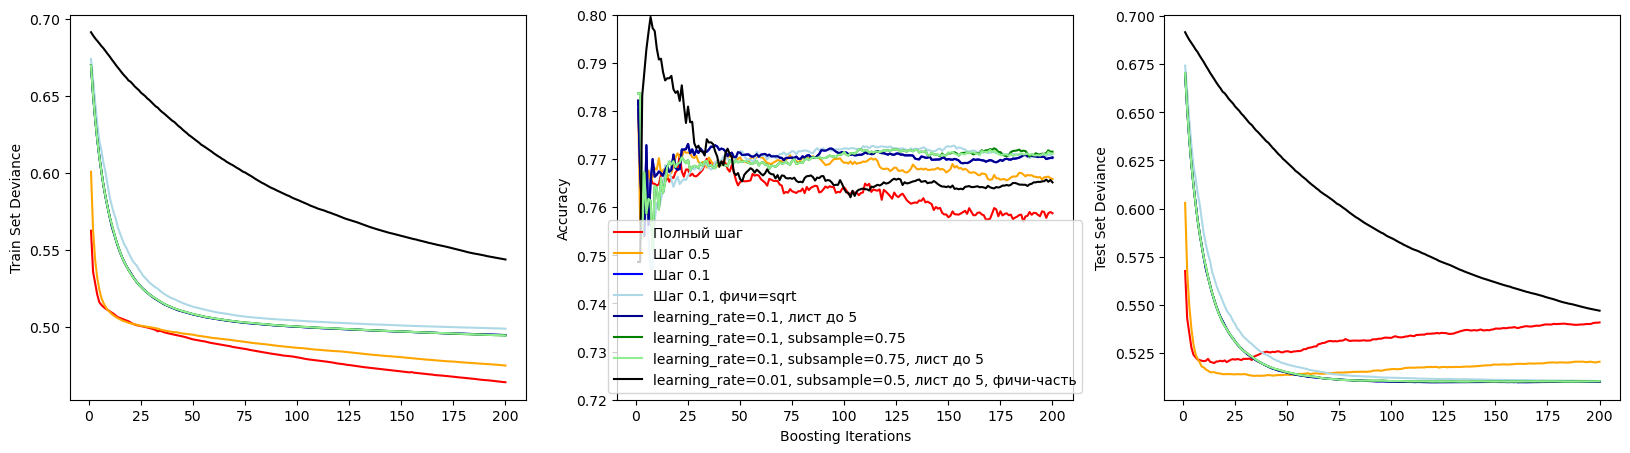

In [40]:
original_params = {
    "n_estimators": 200,
    #"max_leaf_nodes": None,
    #"max_depth": None,
    "random_state": 42,
    'criterion': 'friedman_mse'
    
}

fig = plt.figure(figsize=(20,5))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

for label, color, setting in [
    ("Полный шаг", "red", {"learning_rate": 1.0, "subsample": 1.0}),
    ("Шаг 0.5", "orange", {"learning_rate": 0.5, "subsample": 1.0}),
    ("Шаг 0.1", "blue",   {"learning_rate": 0.1, "subsample": 1.0}),
    ("Шаг 0.1, фичи=sqrt",
              "lightblue", {"learning_rate": 0.1, "subsample": 1.0, "max_features": 'sqrt'},
    ),
    ("learning_rate=0.1, лист до 5",
               "darkblue", {"learning_rate": 0.1, "subsample": 1.0, "min_samples_split" : 5},
    ),
    ("learning_rate=0.1, subsample=0.75",
                  "green", {"learning_rate": 0.1, "subsample": 0.75},
    ),
    ("learning_rate=0.1, subsample=0.75, лист до 5",
             "lightgreen", {"learning_rate": 0.1, "subsample": 0.75, "min_samples_split" : 5},
    ),
    ("learning_rate=0.01, subsample=0.5, лист до 5, фичи-часть",
             "black", {"learning_rate": 0.01, "subsample": 0.5, "min_samples_split" : 5, "max_features": 'sqrt'},
    ),
]:
    params = dict(original_params)
    params.update(setting)

    clf = GradientBoostingClassifier(**params)
    clf.fit(X_train, y_train)
    
    train_deviance = np.zeros((params["n_estimators"],), dtype=np.float64)
    for i, y_pred in enumerate(clf.staged_predict_proba(X_train)):
        train_deviance[i] = log_loss(y_train, y_pred)
        
    ax1.plot(
        (np.arange(train_deviance.shape[0]) + 1),
        train_deviance,
        "-",
        color=color,
        label=label,
    )

    test_score = np.zeros((params["n_estimators"],), dtype=np.float64)
    for i, y_pred in enumerate(clf.staged_predict(X_test)):
        #clf.loss_ assumes that y_test[i] in {0, 1}
        test_score[i] = fbeta_score(y_test, y_pred, beta=2**(1/2))
        
    ax2.plot(
        (np.arange(test_score.shape[0]) + 1),
        test_score,
        "-",
        color=color,
        label=label,
    )
    
    test_deviance = np.zeros((params["n_estimators"],), dtype=np.float64)
    for i, y_pred in enumerate(clf.staged_predict_proba(X_test)):
        #clf.loss_ assumes that y_test[i] in {0, 1}
        test_deviance[i] = log_loss(y_test, y_pred)
        

    ax3.plot(
        (np.arange(test_deviance.shape[0]) + 1),
        test_deviance,
        "-",
        color=color,
        label=label,
    )

ax2.legend(loc='lower center')
ax2.set_xlabel("Boosting Iterations")
ax2.set_ylim(0.72, 0.8)
ax1.set_ylabel("Train Set Deviance")
ax2.set_ylabel("Accuracy")
ax3.set_ylabel("Test Set Deviance")

plt.show()

In [41]:
gbc = GradientBoostingClassifier(n_estimators=100)
gbc.fit(X_train, y_train)

print('Правильность на обучающем наборе: {:.3f}'.format(fbeta_score(y_train, gbc.predict(X_train), beta=2**(1/2))))
print('Правильность на тестовом наборе: {:.3f}'.format(fbeta_score(y_test, gbc.predict(X_test), beta=2**(1/2))))

Правильность на обучающем наборе: 0.781
Правильность на тестовом наборе: 0.771


In [42]:
model_origin = gbc
cv_scores = [
    'train_score',
    'test_score'
]

cv_results_model_origin = pd.DataFrame(
    cross_validate(
        model_origin,
        X_train,
        y_train,
        scoring=f2_scorer,
        cv=cv,
        return_train_score=True,
        return_estimator=True,
    )
)
cv_results_model_origin[cv_scores].agg(["mean", "std"]).T

,mean,std
train_score,0.780349,0.001224
test_score,0.775259,0.003374


In [43]:
model_tuned = TunedThresholdClassifierCV(estimator=model_origin, scoring=f2_scorer)
cv_results_model_tuned = pd.DataFrame(
    cross_validate(
        model_tuned,
        X_train,
        y_train,
        scoring=f2_scorer,
        cv=cv,
        return_train_score=True,
        return_estimator=True,
    )
)
cv_results_model_tuned[cv_scores].agg(["mean", "std"]).T

,mean,std
train_score,0.821893,0.001031
test_score,0.818460,0.002263


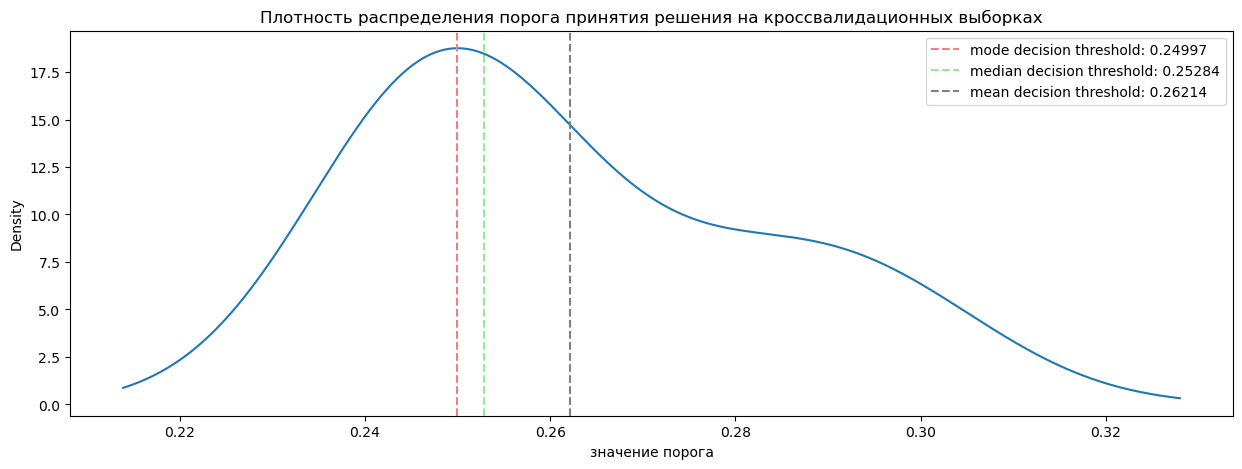

In [44]:
decision_threshold = pd.Series(
    [est.best_threshold_ for est in cv_results_model_tuned["estimator"]],
)

fig, ax = plt.subplots(figsize=(15,5))

ax = decision_threshold.plot.kde(bw_method=None)
line = ax.get_lines()
x_plt, y_plt = line[0].get_data()

ths = {
    'mode':   [x_plt[np.argmax(y_plt)],'lightcoral'],
    'median': [decision_threshold.median(), 'lightgreen'],
    'mean':   [decision_threshold.mean(),  'gray']
}

for key in ths.keys():
    ax.axvline(
        ths[key][0],
        color=ths[key][1],
        linestyle="--",
        label=f"{key} decision threshold: {ths[key][0]:.5f}",
    )

ax.set_xlabel("значение порога")
ax.legend(loc="upper right")
_ = ax.set_title(
    "Плотность распределения порога принятия решения на кроссвалидационных выборках"
)

In [45]:
ths_final = {
    'origin': 0.5,
    'mode':   x_plt[np.argmax(y_plt)],
    'median': decision_threshold.median(),
    'mean':   decision_threshold.mean(),
}
comparison =pd.DataFrame()
for key in ths_final:
    final_tune = FixedThresholdClassifier(model_origin, threshold=ths_final[key]).fit(X_train, y_train)
    comparison.loc[key,'train']= fbeta_score(y_train, final_tune.predict(X_train), beta=2**(1/2))
    comparison.loc[key,'test'] = fbeta_score(y_test, final_tune.predict(X_test), beta=2**(1/2))

comparison.sort_values(by='test')

,train,test
origin,0.781354,0.771433
mode,0.820738,0.810791
median,0.821104,0.810955
mean,0.821574,0.811427


In [46]:
gbc = GradientBoostingClassifier(n_estimators=100)
gbc.fit(X_train, y_train)

gbc_other_threshold = FixedThresholdClassifier(gbc, threshold=0.27, response_method="predict_proba")
gbc_other_threshold.fit(X_train, y_train)

print('Правильность на обучающем наборе: {:.3f}'.format(fbeta_score(y_train, gbc_other_threshold.predict(X_train), beta=2**(1/2))))
print('Правильность на тестовом наборе: {:.3f}'.format(fbeta_score(y_test, gbc_other_threshold.predict(X_test), beta=2**(1/2))))

Правильность на обучающем наборе: 0.821
Правильность на тестовом наборе: 0.811


### 3. Итоговая модель

In [48]:
model = Pipeline(steps=[
                        ('preproc', MinMaxScaler()),
                        ('estimator', KNeighborsClassifier(n_neighbors = 100))
                            ])
model.fit(X_train, y_train)

print('Правильность на обучающем наборе: {:.3f}'.format(fbeta_score(y_train, model.predict(X_train), beta=2**(1/2))))
print('Правильность на тестовом наборе: {:.3f}'.format(fbeta_score(y_test, model.predict(X_test), beta=2**(1/2))))

Правильность на обучающем наборе: 0.759
Правильность на тестовом наборе: 0.743


In [49]:
knn_other_threshold = FixedThresholdClassifier(model, threshold=0.275, response_method="predict_proba")
knn_other_threshold.fit(X_train, y_train)

print('Правильность на обучающем наборе: {:.3f}'.format(fbeta_score(y_train, knn_other_threshold.predict(X_train), beta=2**(1/2))))
print('Правильность на тестовом наборе: {:.3f}'.format(fbeta_score(y_test, knn_other_threshold.predict(X_test), beta=2**(1/2))))

Правильность на обучающем наборе: 0.807
Правильность на тестовом наборе: 0.796


In [50]:
model = Pipeline(steps=[
                        ('preproc', MinMaxScaler()),
                        ('estimator', LogisticRegression())
                            ])
model.fit(X_train, y_train)

print('Правильность на обучающем наборе: {:.3f}'.format(fbeta_score(y_train, model.predict(X_train), beta=2**(1/2))))
print('Правильность на тестовом наборе: {:.3f}'.format(fbeta_score(y_test, model.predict(X_test), beta=2**(1/2))))

Правильность на обучающем наборе: 0.761
Правильность на тестовом наборе: 0.757


In [51]:
lr_other_threshold = FixedThresholdClassifier(model, threshold=0.275, response_method="predict_proba")
lr_other_threshold.fit(X_train, y_train)

print('Правильность на обучающем наборе: {:.3f}'.format(fbeta_score(y_train, lr_other_threshold.predict(X_train), beta=2**(1/2))))
print('Правильность на тестовом наборе: {:.3f}'.format(fbeta_score(y_test, lr_other_threshold.predict(X_test), beta=2**(1/2))))

Правильность на обучающем наборе: 0.819
Правильность на тестовом наборе: 0.810


In [52]:
model = Pipeline(steps=[
                        ('preproc', MinMaxScaler()),
                        ('estimator', SVC(probability=True))
                            ])
model.fit(X_train, y_train)

print('Правильность на обучающем наборе: {:.3f}'.format(fbeta_score(y_train, model.predict(X_train), beta=2**(1/2))))
print('Правильность на тестовом наборе: {:.3f}'.format(fbeta_score(y_test, model.predict(X_test), beta=2**(1/2))))

Правильность на обучающем наборе: 0.788
Правильность на тестовом наборе: 0.771


In [53]:
svc_other_threshold = FixedThresholdClassifier(model, threshold=0.275, response_method="predict_proba")
svc_other_threshold.fit(X_train, y_train)

print('Правильность на обучающем наборе: {:.3f}'.format(fbeta_score(y_train, svc_other_threshold.predict(X_train), beta=2**(1/2))))
print('Правильность на тестовом наборе: {:.3f}'.format(fbeta_score(y_test, svc_other_threshold.predict(X_test), beta=2**(1/2))))

Правильность на обучающем наборе: 0.821
Правильность на тестовом наборе: 0.805
